In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import dates as mdates
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\romo_\Documents\GitHub\Resampling-Datetime-Data-Core-\Data\london_weather.csv")
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [4]:
pd.to_datetime(df['date'])

0       1970-01-01 00:00:00.019790101
1       1970-01-01 00:00:00.019790102
2       1970-01-01 00:00:00.019790103
3       1970-01-01 00:00:00.019790104
4       1970-01-01 00:00:00.019790105
                     ...             
15336   1970-01-01 00:00:00.020201227
15337   1970-01-01 00:00:00.020201228
15338   1970-01-01 00:00:00.020201229
15339   1970-01-01 00:00:00.020201230
15340   1970-01-01 00:00:00.020201231
Name: date, Length: 15341, dtype: datetime64[ns]

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       15322 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15322 non-null  float64       
 4   max_temp          15335 non-null  float64       
 5   mean_temp         15305 non-null  float64       
 6   min_temp          15339 non-null  float64       
 7   precipitation     15335 non-null  float64       
 8   pressure          15337 non-null  float64       
 9   snow_depth        13900 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


In [7]:
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [8]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


In [9]:
df.isna().sum()

precipitation       6
mean_temp          36
min_temp            2
max_temp            6
snow_depth       1441
dtype: int64

In [10]:
for col in df:
    df[col] = df[col].interpolate()

In [11]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

In [12]:
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,0.0
2020-12-28,0.2,1.1,-1.3,3.6,0.0
2020-12-29,0.0,2.6,1.1,4.1,0.0


## Q1: What month had the most precipitation between 2000 through 2010?

In [13]:
df_precip = df['precipitation'].copy()
df_precip.head()

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
Name: precipitation, dtype: float64

In [14]:
df_precip = df_precip.loc['2000':'2010']
df_precip

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, Length: 4018, dtype: float64

In [15]:
df_precip = df_precip.resample("M").sum()
df_precip

date
2000-01-31    16.5
2000-02-29    62.2
2000-03-31    16.0
2000-04-30    99.6
2000-05-31    87.2
              ... 
2010-08-31    88.6
2010-09-30    38.2
2010-10-31    74.8
2010-11-30    32.2
2010-12-31    21.4
Freq: M, Name: precipitation, Length: 132, dtype: float64

In [16]:
precip_max = df_precip.idxmax()

df_precip.loc[precip_max]

155.4

In [17]:
print(precip_max)

2000-10-31 00:00:00


#### The date with the most precipitation was 10/31/2000.

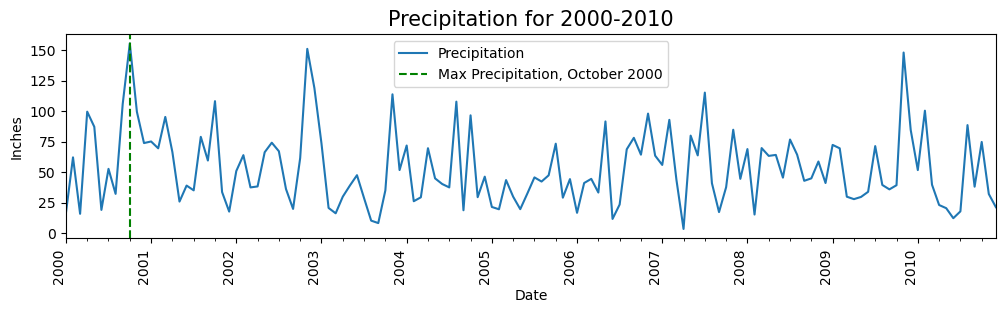

In [18]:
fig, ax = plt.subplots(figsize = (12, 3))

df_precip.plot(ax = ax)

fig.autofmt_xdate(which = 'major', rotation = 90)

ax.set_title('Precipitation for 2000-2010', fontsize = 15)
ax.set_ylabel('Inches')
ax.set_xlabel('Date')
       
ax.axvline(x = precip_max, color = 'g', linestyle = '--',
          label = f'Max Precipitation, {precip_max:%B %Y}')

handles, labels = ax.get_legend_handles_labels()
labels = [label.title() for label in labels]

ax.legend(handles,
          labels,
          loc = 'best');

## Q2: Which year between 2000-2020 had the coolest average temperature?

In [19]:
df_temp = df['mean_temp'].copy()
df_temp.head()

date
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
Name: mean_temp, dtype: float64

In [20]:
df_temp = df_temp.resample("AS").mean()
df_temp

date
2000-01-01    11.582514
2001-01-01    11.339452
2002-01-01    12.084384
2003-01-01    12.138356
2004-01-01    11.868579
2005-01-01    11.825479
2006-01-01    12.299589
2007-01-01    11.926575
2008-01-01    11.347268
2009-01-01    11.736438
2010-01-01    10.635890
2011-01-01    12.378082
2012-01-01    11.329781
2013-01-01    11.164110
2014-01-01    12.660000
2015-01-01    12.137260
2016-01-01    11.919126
2017-01-01    12.210685
2018-01-01    12.529315
2019-01-01    12.193973
2020-01-01    12.729781
Freq: AS-JAN, Name: mean_temp, dtype: float64

In [21]:
df_temp = df_temp.loc['2000':'2020']
df_temp

date
2000-01-01    11.582514
2001-01-01    11.339452
2002-01-01    12.084384
2003-01-01    12.138356
2004-01-01    11.868579
2005-01-01    11.825479
2006-01-01    12.299589
2007-01-01    11.926575
2008-01-01    11.347268
2009-01-01    11.736438
2010-01-01    10.635890
2011-01-01    12.378082
2012-01-01    11.329781
2013-01-01    11.164110
2014-01-01    12.660000
2015-01-01    12.137260
2016-01-01    11.919126
2017-01-01    12.210685
2018-01-01    12.529315
2019-01-01    12.193973
2020-01-01    12.729781
Freq: AS-JAN, Name: mean_temp, dtype: float64

In [22]:
temp_min = df_temp.idxmin()

df_temp.loc[temp_min]

10.635890410958904

In [23]:
print(temp_min)

2010-01-01 00:00:00


#### The year with the coolest avegrage temp is 2010.

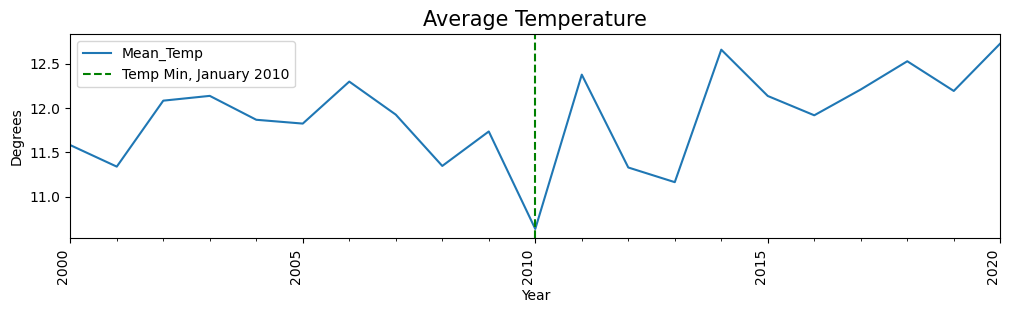

In [24]:
fig, ax = plt.subplots(figsize = (12, 3))

df_temp.plot(ax = ax)

fig.autofmt_xdate(which = 'major', rotation = 90)

ax.set_title('Average Temperature', fontsize = 15)
ax.set_ylabel('Degrees')
ax.set_xlabel('Year')

ax.axvline(x = temp_min, color = 'g', linestyle = '--',
          label = f'Temp min, {temp_min:%B %Y}')

handles, labels = ax.get_legend_handles_labels()
labels = [label.title() for label in labels]

ax.legend(handles,
          labels,
          loc = 'best');